In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
# to change the filepaths
from pathlib import Path
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# import train_test_split from sklearn's model selection module
from sklearn.model_selection import train_test_split
# import SVC from sklearn's svm module
from sklearn.svm import SVC
# import accuracy_score from sklearn's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score


### Loading and Processing of Naive Images
First step of this project is to load, transform and understand the images of the naive honey bees and naive bumble bees. These images are naive because, they are the images of the naive honey and bumble bees instead of the experienced bees.

More details on the naive and experienced bees can be found in the article below 

[Naive&ExperiencedBees](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4196025/)

###1. Import the required python libraries

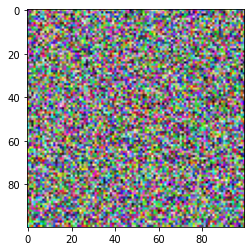

In [2]:
# generating the test_data to test image display using PIL
test_data = np.random.beta(1,1, size= (100,100,3))
# display the test_data
plt.imshow(test_data);

### Open the Images with PIL(Pillow Library)

Loaded image size is: (100, 100)


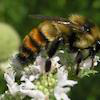

In [3]:
# opening the image
img = Image.open('dataset_eda/bee_1.jpg')

# Getting the image size
img_size = img.size

print("Loaded image size is: {}".format(img_size))

# displaying the image
img

### Data Augmentation with PIL

In this step we will performa a couple of data augmentation techniques and look at the results

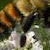

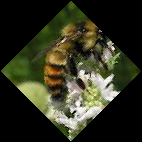

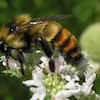

In [4]:
# Crop the image to 25, 25, 75, 75
img_cropped = img.crop([25, 25, 75, 75])
display(img_cropped)

# rotate the image by 45 degrees
img_rotated = img.rotate(45, expand=25)
display(img_rotated)

# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

### Convert Images into an array of data


img_data numPy array has the shape: (100, 100, 3)


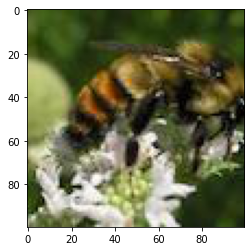

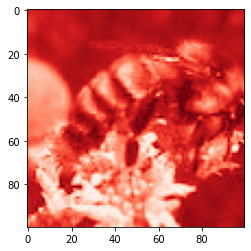

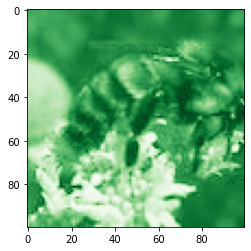

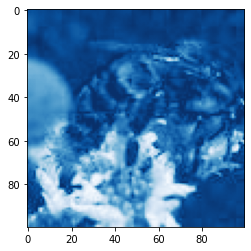

In [5]:
# Turn the image object into a NumPy array
img_data = np.array(img)

# getting  the shape of the resulting array
img_data_shape = img_data.shape

print("img_data numPy array has the shape: {}".format(img_data_shape))

# plotting the data with `imshow`
plt.imshow(img_data)
plt.show()

# plotting the red channel
plt.imshow(img_data[:, :, 0], cmap=plt.cm.Reds_r)
plt.show()

# plotting the green channel
plt.imshow(img_data[:, :, 1], cmap=plt.cm.Greens_r)
plt.show()

# plotting the blue channel
plt.imshow(img_data[:, :, 2], cmap=plt.cm.Blues_r)
plt.show()

### KDE(Kernel Density Plot) Estimate for Each Color Channel

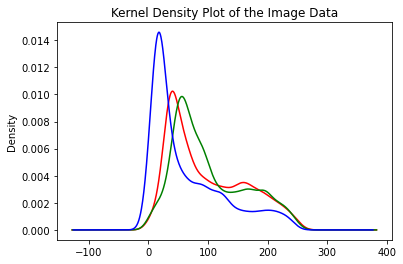

In [6]:
# Defining the function to plot the kernel density plot of the given data
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        `color` is a color string, e.g. 'r', 'g', or 'b'
        `channel is a 2d array`
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# creating the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for idx, color in enumerate(channels):
        plot_kde(image_data[:, :, idx], color)
    plt.title('Kernel Density Plot of the Image Data')    
    plt.show()

plot_rgb(img_data)

### Observing Difference Between Honey and Bumble Bee
In this part, we will observe the difference between the honey and the bumble bee. The first image is of the honey bee and the second one is of the bumble bee.

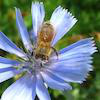

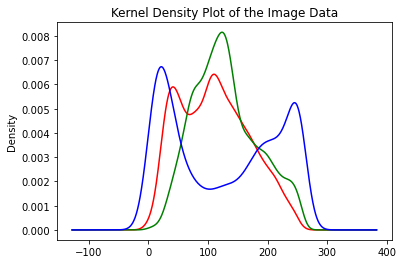

In [9]:
# loading bee_12.jpg as honey_bee
honey_bee = Image.open('dataset_eda/bee_12.jpg')

# displaying the honey bee image
display(honey_bee)

# Creating the NumPy array of the honey bee image data
honey_data = np.array(honey_bee)

# plotting the rgb densities for the honey bee image
plot_rgb(honey_data)

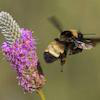

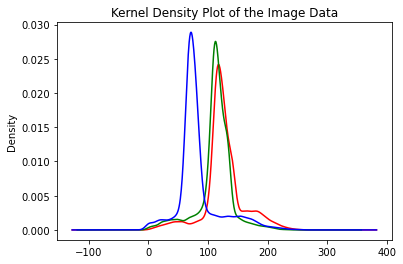

In [11]:
# loading the bee_3.jpg as bumble_bee
bumble_bee = Image.open('dataset_eda/bee_3.jpg')

# displaying the bumble bee image
display(bumble_bee)

# Creating the NumPy array of the bumble bee image data
bumble_data = np.array(bumble_bee)

# plot the rgb densities for the bumble bee image
plot_rgb(bumble_data)


**Observation:** 
When we compare the images above and their rgb plot, we can clearly see how different the color channels are for both the kind of the bees. The honey bee on a blue flower has a strong peak on the right side of the blue channel. However the bumble bee which has a lot of yellow for the bee and the background, has a perfect overlap between the red and the green color channels.

Note : Red + Green makes yellow

### Reducing the Number of Color Channels

Color channel inforamtion is very useful in most of the image classification problem, however for our case it is very distracting. Here, the bees themselves are very similar in color and also they are on top of the flower and flowers themselves are very vibrant in colors. Thus the color of the flowers will be distracting from separating honey bees from the bumble bees. Hence we need to convert the images into the black and white.

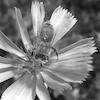

Given NumPy array has the shape: (100, 100)


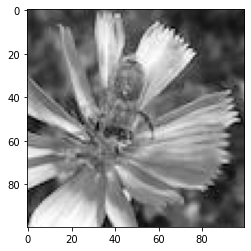

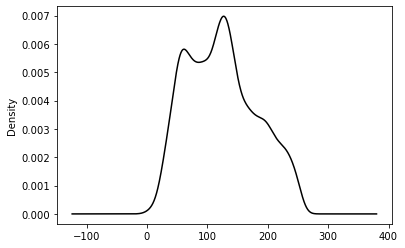

In [12]:
# converting the honey bee image to grayscale
honey_bw = honey_bee.convert("L")
display(honey_bw)

# further converting  the image to a NumPy array
honey_bw_arr = np.array(honey_bw)

# getting the shape of the resulting array
honey_bw_arr_shape = honey_bw_arr.shape
print("Given NumPy array has the shape: {}".format(honey_bw_arr_shape))

# plotring  the array using matplotlib
plt.imshow(honey_bw_arr, cmap=plt.cm.gray);
plt.show();

# plotting the kde of the new grayscale array
plot_kde(honey_bw_arr, 'k');

### Saving the processed images and future changes
We need to save all the augmentation done to the images as they might be useful as a part of the machine learning pipeline.To use these images in the future, all the made change should be saved.







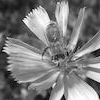

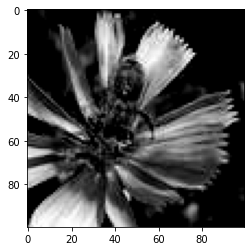

In [16]:
# flipping the image left-right with transpose
honey_bw_flip = honey_bw.transpose(Image.FLIP_LEFT_RIGHT)

# displaying the flipped image
display(honey_bw_flip)

# saving the flipped image
# Need to create a new folder in the current directory("saved_images")
honey_bw_flip.save("dataset_eda/augmented_data/black_white/bw_flipped.jpg")

# creating the higher contrast by reducing the range
honey_hc_arr = np.maximum(honey_bw_arr, 100)

# displaying the higher contrast version
plt.imshow(honey_hc_arr, cmap=plt.cm.gray)

# converting the NumPy array of high contrast to an Image
honey_bw_hc = Image.fromarray(honey_hc_arr)

# saving the high contrast version
honey_bw_hc.save("dataset_eda/augmented_data/high_contrast/bw_hc.jpg")

### Making the Pipeline to simplify all the above steps in one go.

Now it's time to create an image processing pipeline. We have all the tools in our toolbox to load images, transform them, and save the results.

In this part, we have created an image processing pipeline to load the images, transform them and save the results.

Our pipeline  will perform the following steps on the image:
*   Load the image and create the path to save the processed image.
*   Convert the images to grayscale and save them.
*   Rotate, crop, and zoom in the image and save the new image.

In [17]:
image_paths = ['dataset_eda/bee_1.jpg',
               'dataset_eda/bee_12.jpg',
               'dataset_eda/bee_2.jpg',
               'dataset_eda/bee_3.jpg']

def image_processing(path):
    img = Image.open(path)

    # create the paths to save files to
    bw_path = "dataset_eda/augmented_data/black_white/bw_{}.jpg".format(path.stem)
    rcz_path = "dataset_eda/augmented_data/high_contrast/rcz_{}.jpg".format(path.stem)

    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert("L")
    bw.save(bw_path)
    
    print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = bw.rotate(45).crop([25, 25, 75, 75]).resize((100, 100))
    rcz.save(rcz_path)

# for loop over the image paths
for img_path in image_paths:
    # image_processing(img_path)
    image_processing(Path(img_path))

Creating grayscale version of dataset_eda\bee_1.jpg and saving to dataset_eda/augmented_data/black_white/bw_bee_1.jpg.
Creating rotated, cropped, and zoomed version of dataset_eda\bee_1.jpg and saving to dataset_eda/augmented_data/high_contrast/rcz_bee_1.jpg.
Creating grayscale version of dataset_eda\bee_12.jpg and saving to dataset_eda/augmented_data/black_white/bw_bee_12.jpg.
Creating rotated, cropped, and zoomed version of dataset_eda\bee_12.jpg and saving to dataset_eda/augmented_data/high_contrast/rcz_bee_12.jpg.
Creating grayscale version of dataset_eda\bee_2.jpg and saving to dataset_eda/augmented_data/black_white/bw_bee_2.jpg.
Creating rotated, cropped, and zoomed version of dataset_eda\bee_2.jpg and saving to dataset_eda/augmented_data/high_contrast/rcz_bee_2.jpg.
Creating grayscale version of dataset_eda\bee_3.jpg and saving to dataset_eda/augmented_data/black_white/bw_bee_3.jpg.
Creating rotated, cropped, and zoomed version of dataset_eda\bee_3.jpg and saving to dataset_eda/